In [120]:
import glob
import numpy as np
from PIL import Image
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import shutil
from tqdm import tqdm
%matplotlib inline

In [114]:
os.path.isfile("/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10059/micrographs/stack_0290_2x_dfpt.jpg")

False

In [108]:
Image.open("/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10671/micrographs/PS0114.RAMP1-CGRP_110-5_0001_Jan16_12.35.00.jpg")

UnidentifiedImageError: cannot identify image file '/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10671/micrographs/PS0114.RAMP1-CGRP_110-5_0001_Jan16_12.35.00.jpg'

In [113]:
img = cv2.imread("/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10671/micrographs/PS0114.RAMP1-CGRP_110-5_0001_Jan16_12.35.00.jpg")
print(img)

None


In [81]:
t = 0

In [82]:
for empiar_dir in glob.glob(DATA_DIR + "/*/micrographs/*.jpg"):
    t+=1
t

9799

In [77]:
def save_annos_yolo_format(codf,image_path,output_file_path=None):
    im = Image.open(image_path)
    w,h = im.size
    print("Image size:",w,h)
    temp_df = codf.copy()
    temp_df["Height"] = temp_df["Diameter"]
    temp_df = temp_df.rename(columns={"Diameter":"Width"})
    temp_df["X-Coordinate"] = temp_df["X-Coordinate"]/w
    temp_df["Y-Coordinate"] = temp_df["Y-Coordinate"]/h
    temp_df["Width"] = temp_df["Width"]/w
    temp_df["Height"] = temp_df["Height"]/h

    lines = []
    for item in temp_df.values:
        lines.append("{} {:.6f} {:.6f} {:.6f} {:.6f}\n".format(int(item[2]),item[0],item[1],item[3],item[4]))
    with open(output_file_path,"w") as f:
        f.writelines(lines)
    
    return temp_df

In [107]:
DATA_DIR = "/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite"
ANNO_DIR= "/home/shiva/projects/particle_picking/data/cryopp/cryoppp_lite_YOLO/labels/"
IMAGES_DIR = "/home/shiva/projects/particle_picking/data/cryopp/cryoppp_lite_YOLO/images/"
for empiar_dir in glob.glob(DATA_DIR + "/*/"):
    print(empiar_dir)
    empiar_id = empiar_dir.split("/")[-2]
    particle_classes_csv_path = empiar_dir+"ground_truth/empiar-{}_particles_selected.csv".format(empiar_id)
    cls_df = pd.read_csv(particle_classes_csv_path)

    total_files = glob.glob(empiar_dir+"ground_truth/particle_coordinates/*.csv")
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio = 0.10
    x_train, x_test = train_test_split(total_files, test_size=1 - train_ratio)
    x_val, x_test= train_test_split(x_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
    print(len(x_train), len(x_val), len(x_test))
    
    d=  {"train":x_train,"val":x_val,"test":x_test}
    for split,coords_paths in d.items():
        for coords_path in coords_paths:
            particle_file_name = coords_path.split("/")[-1][:-4]
            particle_cls_df = cls_df[cls_df["Particles Filename"] ==particle_file_name + "_particles.mrc"][["X-Coordinate","Y-Coordinate","Class Number"]]
            image_path = empiar_dir + "micrographs/"+particle_file_name + '.jpg'
            df = pd.read_csv(coords_path)[["X-Coordinate","Y-Coordinate","Diameter"]]
            merged_df = pd.merge(particle_cls_df,df,how="inner",on=["X-Coordinate","Y-Coordinate"])
            anno_file_path = ANNO_DIR + particle_file_name + ".txt"
            shutil.copy(image_path, IMAGES_DIR + split +"/")
            print(save_annos_yolo_format(merged_df,image_path,anno_file_path))
            break
        break
    break


/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10532/
240 30 30
Image size: 4096 4096
     X-Coordinate  Y-Coordinate  Class Number    Width   Height
0        0.058594      0.214844            36  0.04248  0.04248
1        0.052734      0.464844            39  0.04248  0.04248
2        0.355469      0.351562            36  0.04248  0.04248
3        0.650391      0.091797             3  0.04248  0.04248
4        0.876953      0.636719            28  0.04248  0.04248
..            ...           ...           ...      ...      ...
304      0.517578      0.191406            36  0.04248  0.04248
305      0.660156      0.751953            15  0.04248  0.04248
306      0.359375      0.904297             6  0.04248  0.04248
307      0.162109      0.781250            33  0.04248  0.04248
308      0.384766      0.882812            30  0.04248  0.04248

[309 rows x 5 columns]


In [54]:
merged_df

,X-Coordinate,Y-Coordinate,Class Number,Diameter
0,1072,1680,39,174
1,3136,1336,39,174
2,1224,2744,39,174
3,1712,2056,39,174
4,928,256,39,174
...,...,...,...,...
294,3736,376,4,174
295,2352,2112,9,174
296,2272,928,2,174
297,1552,440,10,174


In [73]:
df = pd.read_csv("/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10532/ground_truth/empiar-10532_particles_selected.csv")
df

,Particles Filename,Micrographs Filename,X-Coordinate,Y-Coordinate,Angle-Psi,Origin X (Ang),Origin Y (Ang),Defocus U,Defocus V,Defocus Angle,Phase Shift,CTF B Factor,Optics Group,Class Number
0,FoilHole_24136936_Data_24136382_24136384_20200...,FoilHole_24136936_Data_24136382_24136384_20200...,272,840,342.550995,-1.67375,1.00425,25226.734375,24745.345703,237.584915,0.0,0.0,1,3
1,FoilHole_24136936_Data_24136382_24136384_20200...,FoilHole_24136936_Data_24136382_24136384_20200...,504,2344,219.489777,-1.67375,0.33475,25304.105469,24822.716797,237.584915,0.0,0.0,1,39
2,FoilHole_24136936_Data_24136382_24136384_20200...,FoilHole_24136936_Data_24136382_24136384_20200...,3160,3928,285.612244,0.33475,0.33475,25492.187500,25010.798828,237.584915,0.0,0.0,1,39
3,FoilHole_24136936_Data_24136382_24136384_20200...,FoilHole_24136936_Data_24136382_24136384_20200...,1504,1224,76.224480,0.33475,-0.33475,25308.046875,24826.658203,237.584915,0.0,0.0,1,39
4,FoilHole_24136936_Data_24136382_24136384_20200...,FoilHole_24136936_Data_24136382_24136384_20200...,472,3800,309.489777,-1.67375,1.67375,25589.232422,25107.843750,237.584915,0.0,0.0,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87928,FoilHole_24140155_Data_24136372_24136374_20200...,FoilHole_24140155_Data_24136372_24136374_20200...,3816,808,100.102036,-1.00425,1.00425,29085.585938,28396.837891,29.775764,0.0,0.0,1,11
87929,FoilHole_24140155_Data_24136372_24136374_20200...,FoilHole_24140155_Data_24136372_24136374_20200...,416,1216,129.489792,-1.00425,-0.33475,29341.431641,28652.683594,29.775764,0.0,0.0,1,6
87930,FoilHole_24140155_Data_24136372_24136374_20200...,FoilHole_24140155_Data_24136372_24136374_20200...,2160,3416,314.999969,-3.01275,-8.36875,29355.978516,28667.230469,29.775764,0.0,0.0,1,30
87931,FoilHole_24140155_Data_24136372_24136374_20200...,FoilHole_24140155_Data_24136372_24136374_20200...,296,3768,324.183655,3.68225,-5.02125,29989.896484,29301.148438,29.775764,0.0,0.0,1,10


In [79]:
for name,group in df.groupby(by="Particles Filename"):
    print(name)
    # print(group["X-Coordinate"])
    print(group.columns)
    group[group["X-Coordinate"] == "" & group["Y-Coordinate"] == ""]
    group["bbox_TL_X"] = group["X-Coordinate"]-(group["Diameter"]//2)
    group["bbox_TL_Y"] = group["Y-Coordinate"]-(group["Diameter"]//2)
    group["bbox_BR_X"] = group["X-Coordinate"]+(group["Diameter"]//2)
    group["bbox_BR_Y"] = group["Y-Coordinate"]+(group["Diameter"]//2)
    print(group)
    break

FoilHole_24136295_Data_24136382_24136384_20200224_020538_Fractions_patch_aligned_particles.mrc
Index(['Particles Filename', 'Micrographs Filename', 'X-Coordinate',
       'Y-Coordinate', 'Angle-Psi', 'Origin X (Ang)', 'Origin Y (Ang)',
       'Defocus U', 'Defocus V', 'Defocus Angle', 'Phase Shift',
       'CTF B Factor', 'Optics Group', 'Class Number'],
      dtype='object')


KeyError: 'Diameter'

In [33]:

codf = pd.read_csv("/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10590/ground_truth/particle_coordinates/WTcomplex_GraFix_1540_DW.csv")
image = cv2.imread("/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10590/micrographs/WTcomplex_GraFix_1540_DW.jpg", cv2.IMREAD_GRAYSCALE)

In [56]:
def save_annos_yolo_format(codf,image_path):
    im = Image.open(image_path)
    w,h = im.size
    print("Image size:",w,h)
    temp_df = codf.copy()
    temp_df["Height"] = temp_df["Diameter"]
    temp_df = temp_df.rename(columns={"Diameter":"Width"})
    temp_df["X-Coordinate"] = temp_df["X-Coordinate"]/w
    temp_df["Y-Coordinate"] = temp_df["Y-Coordinate"]/h
    temp_df["Width"] = temp_df["Width"]/w
    temp_df["Height"] = temp_df["Height"]/h

    return temp_df
    

In [57]:
save_annos_yolo_format(merged_df,"/home/shiva/projects/particle_picking/data/cryopp/cryopp_lite/10590/micrographs/WTcomplex_GraFix_1540_DW.jpg")

Image size: 3710 3838


,X-Coordinate,Y-Coordinate,Class Number,Width,Height
0,0.288949,0.437728,39,0.0469,0.045336
1,0.845283,0.348098,39,0.0469,0.045336
2,0.329919,0.714956,39,0.0469,0.045336
3,0.461456,0.535696,39,0.0469,0.045336
4,0.250135,0.066701,39,0.0469,0.045336
...,...,...,...,...,...
294,1.007008,0.097968,4,0.0469,0.045336
295,0.633962,0.550287,9,0.0469,0.045336
296,0.612399,0.241793,2,0.0469,0.045336
297,0.418329,0.114643,10,0.0469,0.045336


In [9]:
image.shape

(3838, 3710)

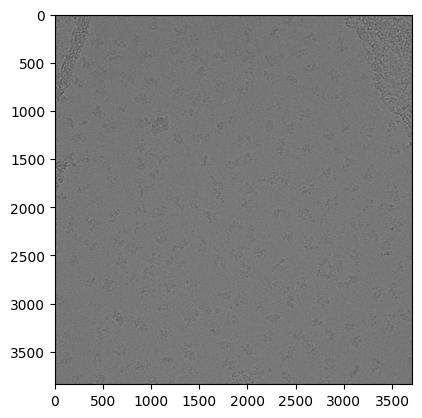

In [10]:
imgplot = plt.imshow(image,cmap='gray')
plt.show()

In [18]:
codf

,X-Coordinate,Y-Coordinate,Diameter,Angle-Psi,Origin X (Ang),Origin Y (Ang),Defocus U,Defocus V,Defocus Angle,Phase Shift,CTF B Factor,bbox_TL_X,bbox_TL_Y,bbox_BR_X,bbox_BR_Y
0,2720,3201,158,15.612244,-1.462500,1.462500,37026.656250,36476.972656,243.332962,0.0,0.0,2641,3122,2799,3280
1,3124,3679,158,291.122437,-0.487500,5.362500,37196.054688,36646.371094,243.332962,0.0,0.0,3045,3600,3203,3758
2,1548,1507,158,90.918365,0.487500,14.137501,36652.023438,36102.339844,243.332962,0.0,0.0,1469,1428,1627,1586
3,1172,3582,158,171.734695,15.112499,5.362500,37179.722656,36630.039062,243.332962,0.0,0.0,1093,3503,1251,3661
4,2424,2308,158,184.591827,9.262501,-1.462500,36883.269531,36333.585938,243.332962,0.0,0.0,2345,2229,2503,2387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1400,2269,158,142.346924,-7.312500,-13.162499,36698.281250,36148.597656,243.332962,0.0,0.0,1321,2190,1479,2348
184,3528,2701,158,258.061188,1.462500,4.387500,36908.828125,36359.144531,243.332962,0.0,0.0,3449,2622,3607,2780
185,2652,2144,158,11.938775,-10.237499,8.287500,36893.394531,36343.710938,243.332962,0.0,0.0,2573,2065,2731,2223
186,723,3463,158,15.612244,7.312500,1.462500,36900.347656,36350.664062,243.332962,0.0,0.0,644,3384,802,3542


In [12]:
codf["bbox_TL_X"] = codf["X-Coordinate"]-(codf["Diameter"]//2)
codf["bbox_TL_Y"] = codf["Y-Coordinate"]-(codf["Diameter"]//2)
codf["bbox_BR_X"] = codf["X-Coordinate"]+(codf["Diameter"]//2)
codf["bbox_BR_Y"] = codf["Y-Coordinate"]+(codf["Diameter"]//2)

In [13]:
codf

,X-Coordinate,Y-Coordinate,Diameter,Angle-Psi,Origin X (Ang),Origin Y (Ang),Defocus U,Defocus V,Defocus Angle,Phase Shift,CTF B Factor,bbox_TL_X,bbox_TL_Y,bbox_BR_X,bbox_BR_Y
0,2720,3201,158,15.612244,-1.462500,1.462500,37026.656250,36476.972656,243.332962,0.0,0.0,2641,3122,2799,3280
1,3124,3679,158,291.122437,-0.487500,5.362500,37196.054688,36646.371094,243.332962,0.0,0.0,3045,3600,3203,3758
2,1548,1507,158,90.918365,0.487500,14.137501,36652.023438,36102.339844,243.332962,0.0,0.0,1469,1428,1627,1586
3,1172,3582,158,171.734695,15.112499,5.362500,37179.722656,36630.039062,243.332962,0.0,0.0,1093,3503,1251,3661
4,2424,2308,158,184.591827,9.262501,-1.462500,36883.269531,36333.585938,243.332962,0.0,0.0,2345,2229,2503,2387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1400,2269,158,142.346924,-7.312500,-13.162499,36698.281250,36148.597656,243.332962,0.0,0.0,1321,2190,1479,2348
184,3528,2701,158,258.061188,1.462500,4.387500,36908.828125,36359.144531,243.332962,0.0,0.0,3449,2622,3607,2780
185,2652,2144,158,11.938775,-10.237499,8.287500,36893.394531,36343.710938,243.332962,0.0,0.0,2573,2065,2731,2223
186,723,3463,158,15.612244,7.312500,1.462500,36900.347656,36350.664062,243.332962,0.0,0.0,644,3384,802,3542


In [14]:
bbox_cords = codf[["bbox_TL_X",'bbox_TL_Y','bbox_BR_X','bbox_BR_Y']].values
bbox_cords

array([[2641, 3122, 2799, 3280],
       [3045, 3600, 3203, 3758],
       [1469, 1428, 1627, 1586],
       [1093, 3503, 1251, 3661],
       [2345, 2229, 2503, 2387],
       [1435,  507, 1593,  665],
       [  80, 1052,  238, 1210],
       [1645, 1081, 1803, 1239],
       [2971, 3162, 3129, 3320],
       [2527, 1308, 2685, 1466],
       [2908,  279, 3066,  437],
       [1361,  165, 1519,  323],
       [2191,  109, 2349,  267],
       [2743, 1564, 2901, 1722],
       [2755, 2633, 2913, 2791],
       [3438, 1342, 3596, 1500],
       [1497, 1212, 1655, 1370],
       [2305, 3480, 2463, 3638],
       [3238, 2212, 3396, 2370],
       [3016, 2673, 3174, 2831],
       [2584,  461, 2742,  619],
       [ 564, 3060,  722, 3218],
       [2134,  558, 2292,  716],
       [2032, 2935, 2190, 3093],
       [2760, 1195, 2918, 1353],
       [1588, 3213, 1746, 3371],
       [2527, 1763, 2685, 1921],
       [ 109, 2463,  267, 2621],
       [ 388, 3196,  546, 3354],
       [ 786, 3571,  944, 3729],
       [ 7

In [15]:
for x1,y1,x2,y2 in bbox_cords:
    image = cv2.rectangle(image, (x1,y1), (x2,y2), color = (0, 0, 0), thickness=2)

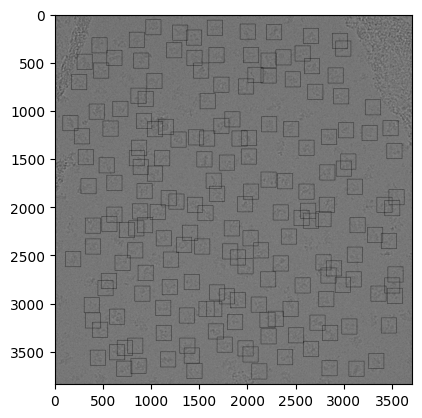

In [16]:
imgplot = plt.imshow(image,cmap='gray')
plt.show()

In [57]:
cv2.imwrite("/home/shiva/projects/particle_picking/test.jpg",image)

True

In [122]:
clss = []
for filepath in tqdm(glob.glob("/home/shiva/projects/particle_picking/data/cryopp/cryoppp_lite_YOLO/labels/*.txt")):
    with open(filepath,"r") as f:
        lines = f.readlines()
    for line in lines:
        cls_no = int(line.split(" ")[0])
        clss.append(cls_no)

  0%|          | 0/9065 [00:00<?, ?it/s]

100%|██████████| 9065/9065 [00:37<00:00, 242.76it/s]


In [128]:
len(set(clss))

82

In [131]:
lines = []
for cls_t in range(1,101):
    lines.append("{}: particle_no_{}\n".format(cls_t,cls_t))

with open("/home/shiva/projects/particle_picking/src/YOLO/cls_no_name.txt","w") as f:
    f.writelines(lines)

In [138]:
LABEL_DIR = "/home/shiva/projects/particle_picking/data/cryopp/cryoppp_lite_YOLO/labels/" 
for img_filepath in tqdm(glob.glob("/home/shiva/projects/particle_picking/data/cryopp/cryoppp_lite_YOLO/images/*/*.jpg")):
    split = img_filepath.split("/")[-2]
    file_name = img_filepath.split("/")[-1][:-4]
    original_label_path = LABEL_DIR + file_name + ".txt"
    new_label_path = LABEL_DIR + split + "/"+ file_name + ".txt"
    shutil.copy(original_label_path, new_label_path)

  0%|          | 0/10337 [00:00<?, ?it/s]

100%|██████████| 10337/10337 [00:01<00:00, 6182.14it/s]
